# Assignment 4 : Loan Payment

### by SasiNakchatree

## Installing Package 

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Download data 
data=pd.read_csv("C:/Users/White/OneDrive/Desktop/loan.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes.value_counts()

float64    105
object      36
int64        4
dtype: int64

In [5]:
adj_data = data.drop(["id","member_id","sub_grade", "emp_title","disbursement_method"
                       ,"home_ownership","verification_status","verification_status_joint","issue_d"
                       ,"pymnt_plan","url","desc","purpose","title","zip_code","addr_state","earliest_cr_line"
                       ,"settlement_date","payment_plan_start_date","hardship_end_date","hardship_start_date"
                       ,"debt_settlement_flag_date","last_pymnt_d","next_pymnt_d","last_credit_pull_d"
                       ,"sec_app_earliest_cr_line"],1)             

In [6]:
adj_data.dtypes.value_counts()

float64    102
object      13
int64        4
dtype: int64

In [7]:
adj_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,...,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,2500.0,36 months,13.56,84.92,C,10+ years,55000.0,Current,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,60 months,18.94,777.23,D,10+ years,90000.0,Current,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,6 years,59280.0,Current,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,36 months,18.94,146.51,D,10+ years,92000.0,Current,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,16.14,731.78,C,10+ years,57250.0,Current,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN


## Cleaning data 

### Imputing negative and positive relationship

In [8]:
negative = ["all_util","annual_inc","annual_inc_joint","avg_cur_bal","bc_util",
            "hardship_last_payment_amount","il_util","inq_fi","last_pymnt_amnt",
            "mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
            "mo_sin_rcnt_tl","mths_since_last_delinq","mths_since_last_major_derog",
            "mths_since_last_record","mths_since_recent_bc_dlq","mths_since_recent_revol_delinq",
            "mths_since_recent_bc","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats",
            "num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0",
            "num_sats","open_acc","open_acc_6m","open_rv_12m","open_rv_24m","pct_tl_nvr_dlq",
            "revol_bal_joint","revol_util","sec_app_open_acc","sec_app_revol_util",
            "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_mths_since_last_major_derog",
            "total_acc","tot_cur_bal","total_bal_il","total_cu_tl"]

positive = ["acc_now_delinq","acc_open_past_24mths","bc_open_to_buy","chargeoff_within_12_mths",
            "collections_12_mths_ex_med","delinq_amnt","deferral_term","delinq_2yrs","dti",
            "dti_joint","funded_amnt_inv","hardship_amount","hardship_length","hardship_dpd",
            "hardship_payoff_balance_amount","inq_last_6mths","inq_last_12m","mths_since_rcnt_il",
            "max_bal_bc","mort_acc","mths_since_recent_inq","num_accts_ever_120_pd","num_tl_120dpd_2m",
            "num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","orig_projected_additional_accrued_interest",
            "open_act_il","open_il_12m","open_il_24m","percent_bc_gt_75","pub_rec_bankruptcies","pub_rec",
            "sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_chargeoff_within_12_mths",
            "sec_app_collections_12_mths_ex_med","settlement_amount","settlement_percentage","settlement_term",
            "tax_liens","total_bal_ex_mort","tot_hi_cred_lim","total_bc_limit","total_il_high_credit_limit",
            "total_rev_hi_lim","tot_coll_amt","total_rec_prncp","total_rec_late_fee"]

In [9]:
for i in negative:
    adj_data[i].fillna(-100000000,inplace=True)
    
for i in positive:
    adj_data[i].fillna(100000000,inplace=True)

### Ranking and relative values 

In [11]:
adj_data["term"].replace(" 36 months",3, inplace = True)
adj_data["term"].replace(" 60 months",5, inplace = True)

In [12]:
adj_data["emp_length"].replace("n/a",0, inplace = True)
adj_data["emp_length"].replace("< 1 year",0, inplace = True)
adj_data["emp_length"].replace("1 year",1, inplace = True)
adj_data["emp_length"].replace("2 years",2, inplace = True)
adj_data["emp_length"].replace("3 years",3, inplace = True)
adj_data["emp_length"].replace("4 years",4, inplace = True)
adj_data["emp_length"].replace("5 years",5, inplace = True)
adj_data["emp_length"].replace("6 years",6, inplace = True)
adj_data["emp_length"].replace("7 years",7, inplace = True)
adj_data["emp_length"].replace("8 years",8, inplace = True)
adj_data["emp_length"].replace("9 years",9, inplace = True)
adj_data["emp_length"].replace("10+ years",10, inplace = True)

In [13]:
adj_data["loan_status"].replace("Current",0, inplace = True)
adj_data["loan_status"].replace("Fully Paid",0, inplace = True)
adj_data["loan_status"].replace("Default",1, inplace = True)
adj_data["loan_status"].replace("Charged Off",1, inplace = True)
adj_data["loan_status"].replace("In Grace Period",1, inplace = True)
adj_data["loan_status"].replace("Late (16-30 days)",1, inplace = True)
adj_data["loan_status"].replace("Late (31-120 days)",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Charged Off",1, inplace = True)

In [14]:
adj_data["grade"].replace("A",1, inplace = True)
adj_data["grade"].replace("B",2, inplace = True)
adj_data["grade"].replace("C",3, inplace = True)
adj_data["grade"].replace("D",4, inplace = True)
adj_data["grade"].replace("E",5, inplace = True)
adj_data["grade"].replace("F",6, inplace = True)
adj_data["grade"].replace("G",7, inplace = True)

In [15]:
adj_data["hardship_type"].replace("nan",0, inplace = True)
adj_data["hardship_type"].replace("INTEREST ONLY-3 MONTHS DEFERRAL",1, inplace = True)

In [16]:
adj_data["hardship_status"].replace("ACTIVE",1, inplace = True)
adj_data["hardship_status"].replace("COMPLETED",1, inplace = True)
adj_data["hardship_status"].replace("BROKEN",1, inplace = True)
adj_data["hardship_status"].replace("nan",0, inplace = True)

In [17]:
adj_data["hardship_reason"].replace("UNEMPLOYMENT",1, inplace = True)
adj_data["hardship_reason"].replace("NATURAL_DISASTER",1, inplace = True)
adj_data["hardship_reason"].replace("EXCESSIVE_OBLIGATIONS",1, inplace = True)
adj_data["hardship_reason"].replace("MEDICAL",1, inplace = True)
adj_data["hardship_reason"].replace("INCOME_CURTAILMENT",1, inplace = True)
adj_data["hardship_reason"].replace("DISABILITY",1, inplace = True)
adj_data["hardship_reason"].replace("REDUCED_HOURS",1, inplace = True)
adj_data["hardship_reason"].replace("FAMILY_DEATH",1, inplace = True)
adj_data["hardship_reason"].replace("'DIVORCE",1, inplace = True)
adj_data["hardship_reason"].replace("NaN",0, inplace = True)

In [18]:
adj_data["hardship_loan_status"].replace("nan",0,inplace = True)
adj_data["hardship_loan_status"].replace("Current",1,inplace = True)
adj_data["hardship_loan_status"].replace("Issued",1,inplace = True)
adj_data["hardship_loan_status"].replace("In Grace Period",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (16-30 days)",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (31-120 days)",1,inplace = True)

In [19]:
adj_data["settlement_status"].replace("ACTIVE",1, inplace = True)
adj_data["settlement_status"].replace("COMPLETED",1, inplace = True)
adj_data["settlement_status"].replace("BROKEN",0, inplace = True)
adj_data["settlement_status"].replace("CANCELLED",0, inplace = True)
adj_data["settlement_status"].replace("DENIED",0, inplace = True)
adj_data["settlement_status"].replace("DRAFT",0, inplace = True)
adj_data["settlement_status"].replace("NaN",0, inplace = True)

In [20]:
adj_data["debt_settlement_flag"].replace("Y",1, inplace = True)
adj_data["debt_settlement_flag"].replace("N",0, inplace = True)

### Clear NaN values 

In [21]:
adj_data["emp_length"].fillna(-100000000,inplace=True)
adj_data["hardship_type"].fillna(0,inplace=True)
adj_data["hardship_reason"].fillna(0,inplace=True)
adj_data["hardship_status"].fillna(0,inplace=True)
adj_data["hardship_loan_status"].fillna(0,inplace=True)
adj_data["settlement_status"].fillna(0,inplace=True)

### Using Dummies for 'object' data 

In [22]:
adj_data.select_dtypes('object')

,initial_list_status,application_type,hardship_flag,hardship_reason,settlement_status
0,w,Individual,N,0,0
1,w,Individual,N,0,0
2,w,Individual,N,0,0
3,w,Individual,N,0,0
4,w,Individual,N,0,0
5,w,Individual,N,0,0
6,w,Individual,N,0,0
7,w,Individual,N,0,0
8,w,Individual,N,0,0
9,w,Individual,N,0,0


In [23]:
obj = ["initial_list_status","application_type","hardship_flag","hardship_reason","settlement_status"]
dummies = pd.get_dummies(adj_data[obj], drop_first = True)

In [24]:
adj_data = pd.concat([adj_data,dummies],axis=1)
adj_data = adj_data.drop(obj,axis=1)

In [296]:
adj_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,...,settlement_amount,settlement_percentage,settlement_term,initial_list_status_w,application_type_Joint App,hardship_flag_Y,hardship_reason_1,hardship_reason_DIVORCE,settlement_status_1,settlement_status_COMPLETE
0,2500,2500,2500.0,3,13.56,84.92,3,10.0,55000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
1,30000,30000,30000.0,5,18.94,777.23,4,10.0,90000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
2,5000,5000,5000.0,3,17.97,180.69,4,6.0,59280.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
3,4000,4000,4000.0,3,18.94,146.51,4,10.0,92000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
4,30000,30000,30000.0,5,16.14,731.78,3,10.0,57250.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
5,5550,5550,5550.0,3,15.02,192.45,3,10.0,152500.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
6,2000,2000,2000.0,3,17.97,72.28,4,4.0,51000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
7,6000,6000,6000.0,3,13.56,203.79,3,10.0,65000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
8,5000,5000,5000.0,3,17.97,180.69,4,10.0,53580.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0
9,6000,6000,6000.0,3,14.47,206.44,3,0.0,300000.0,0,...,100000000.0,100000000.0,100000000.0,1,0,0,0,0,0,0


## Using GBM model 

In [25]:
#Set parameter
model_data = adj_data

y = model_data["loan_status"] 
x = model_data.drop("loan_status",axis= 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Important Features 

In [27]:
# 13 first important features
Imp_feats = ["funded_amnt","total_rec_prncp","open_il_12m","last_pymnt_amnt",
            "grade","total_rec_late_fee","debt_settlement_flag",
            "settlement_amount","installment","open_il_24m",
            "settlement_term","inq_last_12m","loan_amnt"]

### Find the Best result

In [28]:
# Set new train and test
xx_train = x_train[Imp_feats]
xx_test = x_test[Imp_feats]

In [29]:
params = {'n_estimators': 100,'max_leaf_nodes':10,'learning_rate': 0.5, 'random_state':1}
best_model = ensemble.GradientBoostingClassifier(**params)
best_model.fit(xx_train, y_train)

roc_auc_score(y_test, best_model.predict(xx_test))

0.8013054373536258

In [30]:
import pickle
filename = 'GB model.sav'
pickle.dump(best_model, open(filename, 'wb'))

### Results of Model

In [31]:
results = pd.DataFrame()
results['loan_status']= y_test
results['No Delinquency'] = best_model.predict_proba(xx_test)[:, 0]
results['Delinquency'] = best_model.predict_proba(xx_test)[:, 1]
results['loan_amnt'] = adj_data['loan_amnt'] 
results['term'] = adj_data['term']
results.head(10)

,loan_status,No Delinquency,Delinquency,loan_amnt,term
1748841,0,0.960951,0.039049,6075,3
167320,0,0.913374,0.086626,15000,5
1755836,1,0.047964,0.952036,18225,5
2007145,0,0.997818,0.002182,3900,3
273050,0,0.779824,0.220176,20000,3
809969,0,0.996114,0.003886,7350,3
1195483,0,0.998962,0.001038,15000,3
1366186,0,0.998082,0.001918,14000,3
1283099,0,0.987151,0.012849,18000,3
260929,0,0.847034,0.152966,35000,5


In [96]:
g1 = results.loc[results.Delinquency < 0.1, :]
g2 = results.loc[(results.Delinquency> 0.1) & (results.Delinquency< 0.2), :]
g3 = results.loc[(results.Delinquency> 0.2) & (results.Delinquency< 0.3), :]
g4 = results.loc[(results.Delinquency> 0.3) & (results.Delinquency< 0.4), :]
g5 = results.loc[(results.Delinquency> 0.4) & (results.Delinquency< 0.5), :]
g6 = results.loc[(results.Delinquency> 0.5) & (results.Delinquency< 0.6), :]
g7 = results.loc[(results.Delinquency> 0.6) & (results.Delinquency< 0.7), :]
g8 = results.loc[(results.Delinquency> 0.7) & (results.Delinquency< 0.8), :]
g9 = results.loc[(results.Delinquency> 0.8) & (results.Delinquency< 0.9), :]
g10 = results.loc[results.Delinquency > 0.9, :]

In [97]:
br1 = (g1.loan_status == 1).sum()/len(g1)
br2 = (g2.loan_status == 1).sum()/len(g2)
br3 = (g3.loan_status == 1).sum()/len(g3)
br4 = (g4.loan_status == 1).sum()/len(g4)
br5 = (g5.loan_status == 1).sum()/len(g5)
br6 = (g6.loan_status == 1).sum()/len(g6)
br7 = (g7.loan_status == 1).sum()/len(g7)
br8 = (g8.loan_status == 1).sum()/len(g8)
br9 = (g9.loan_status == 1).sum()/len(g9)
br10 = (g10.loan_status == 1).sum()/len(g10)

In [98]:
bad_rate = pd.DataFrame({"G1":[br1], 
                         "G2":[br2],
                         "G3":[br3],
                         "G4":[br4], 
                         "G5":[br5],
                         "G6":[br6],
                         "G7":[br7], 
                         "G8":[br8],
                         "G9":[br9],
                         "G10":[br10]})
bad_rate

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,0.019498,0.141796,0.244723,0.349868,0.45354,0.578987,0.700575,0.799283,0.889066,0.997543


In [99]:
for i in bad_rate.columns:
    rf = 0.02
    E_payoff = 1+rf
    r = (E_payoff/(1-bad_rate.loc[0,i]))-1
    bad_rate.loc[1,i] = r

In [100]:
bad_rate.rename(index={0: "bad_rate", 1: "interest_rate"})

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
bad_rate,0.019498,0.141796,0.244723,0.349868,0.453540,0.578987,0.700575,0.799283,0.889066,0.997543
interest_rate,0.040284,0.188529,0.350497,0.568912,0.866559,1.422726,2.406529,4.081786,8.194641,414.057297


## Loan payment Calculating

In [101]:
def loan_payment(r, pv, n):
    pmt = (r*pv)/(1-(1/pow((1+r),n)))
    return pmt

In [140]:
number = len(g1)
for i in range(number):
    r = 1-bad_rate.iloc[1,0]
    pv = g1.iloc[i,3]
    n = g1.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g1.iloc[i,5] = pmt
    
g1.rename(columns ={5: "loan_payment"},inplace= True)

In [129]:
number = len(g2)
for i in range(number):
    r = 1-bad_rate.iloc[1,1]
    pv = g2.iloc[i,3]
    n = g2.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g2.iloc[i,5] = pmt
    
g2.rename(columns ={5: "loan_payment"},inplace= True)

In [211]:
number = len(g3)
for i in range(number):
    r = 1-bad_rate.iloc[1,2]
    pv = g3.iloc[i,3]
    n = g3.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g3.iloc[i,5] = pmt
    
g3.rename(columns ={5: "loan_payment"},inplace= True)    

In [249]:
number = len(g4)
for i in range(number):
    r = 1-bad_rate.iloc[1,3]
    pv = g4.iloc[i,3]
    n = g4.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g4.iloc[i,5] = pmt
    
g4.rename(columns ={5: "loan_payment"},inplace= True)

In [132]:
number = len(g5)
for i in range(number):
    r = 1-bad_rate.iloc[1,4]
    pv = g5.iloc[i,3]
    n = g5.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g5.iloc[i,5] = pmt
    
g5.rename(columns ={5: "loan_payment"},inplace= True)

In [133]:
number = len(g6)
for i in range(number):
    r = 1-bad_rate.iloc[1,5]
    pv = g6.iloc[i,3]
    n = g6.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g6.iloc[i,5] = pmt
    
g6.rename(columns ={5: "loan_payment"},inplace= True)

In [134]:
number = len(g7)
for i in range(number):
    r = 1-bad_rate.iloc[1,6]
    pv = g7.iloc[i,3]
    n = g7.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g7.iloc[i,5] = pmt
    
g7.rename(columns ={5: "loan_payment"},inplace= True)

In [135]:
number = len(g8)
for i in range(number):
    r = 1-bad_rate.iloc[1,7]
    pv = g8.iloc[i,3]
    n = g8.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g8.iloc[i,5] = pmt
    
g8.rename(columns ={5: "loan_payment"},inplace= True)

In [136]:
number = len(g9)
for i in range(number):
    r = 1-bad_rate.iloc[1,8]
    pv = g9.iloc[i,3]
    n = g9.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g9.iloc[i,5] = pmt
    
g9.rename(columns ={5: "loan_payment"},inplace= True)

In [137]:
number = len(g10)
for i in range(number):
    r = 1-bad_rate.iloc[1,9]
    pv = g10.iloc[i,3]
    n = g10.iloc[i,4]
    pmt = loan_payment(r,pv,n)
    g10.iloc[i,5] = pmt
    
g10.rename(columns ={5: "loan_payment"},inplace= True)

## Expected NPV Calculating 

In [164]:
def exp_npv(loan_amnt,prob_default,term,payment,discount_rate):
    amnt = loan_amnt
    pd = prob_default
    n = term
    pmt = payment
    rd = discount_rate
    
    if n == 3:
        npv = ((pd*pmt)/(1+rd))+(((pd**2)*pmt)/(1+rd)**2)+(((pd**3)*(pmt+amnt))/(1+rd)**3)
    else:
        
        npv = ((pd*pmt)/(1+rd))+(((pd**2)*pmt)/(1+rd)**2)+(((pd**3)*(pmt))/(1+rd)**3)+(((pd**4)*(pmt))/(1+rd)**4)+(((pd**5)*(pmt+amnt))/(1+rd)**5)
    
    return npv  

In [297]:
number = len(g1)
for i in range(number):
    npv = exp_npv(g1.iloc[i,3],1-bad_rate.iloc[1,0],g1.iloc[i,4],g1.iloc[i,5],0.02)
    g1.iloc[i,6] = npv
    
g1.rename(columns ={6: "expected_npv"},inplace= True)

In [298]:
number = len(g2)
for i in range(number):
    npv = exp_npv(g2.iloc[i,3],1-bad_rate.iloc[1,1],g2.iloc[i,4],g2.iloc[i,5],0.02)
    g2.iloc[i,6] = npv
    
g2.rename(columns ={6: "expected_npv"},inplace= True)

In [299]:
number = len(g3)
for i in range(number):
    npv = exp_npv(g3.iloc[i,3],1-bad_rate.iloc[1,2],g3.iloc[i,4],g3.iloc[i,5],0.02)
    g3.iloc[i,6] = npv
    
g3.rename(columns ={6: "expected_npv"},inplace= True)

In [300]:
number = len(g4)
for i in range(number):
    npv = exp_npv(g4.iloc[i,3],1-bad_rate.iloc[1,3],g4.iloc[i,4],g4.iloc[i,5],0.02)
    g4.iloc[i,6] = npv
    
g4.rename(columns ={6: "expected_npv"},inplace= True)

In [301]:
number = len(g5)
for i in range(number):
    npv = exp_npv(g5.iloc[i,3],1-bad_rate.iloc[1,4],g5.iloc[i,4],g5.iloc[i,5],0.02)
    g5.iloc[i,6] = npv
    
g5.rename(columns ={6: "expected_npv"},inplace= True)

In [302]:
number = len(g6)
for i in range(number):
    npv = exp_npv(g6.iloc[i,3],1-bad_rate.iloc[1,5],g6.iloc[i,4],g6.iloc[i,5],0.02)
    g6.iloc[i,6] = npv
    
g6.rename(columns ={6: "expected_npv"},inplace= True)

In [303]:
number = len(g7)
for i in range(number):
    npv = exp_npv(g7.iloc[i,3],1-bad_rate.iloc[1,6],g7.iloc[i,4],g7.iloc[i,5],0.02)
    g7.iloc[i,6] = npv
    
g7.rename(columns ={6: "expected_npv"},inplace= True)

In [304]:
number = len(g8)
for i in range(number):
    npv = exp_npv(g8.iloc[i,3],1-bad_rate.iloc[1,7],g8.iloc[i,4],g8.iloc[i,5],0.02)
    g8.iloc[i,6] = npv
    
g8.rename(columns ={6: "expected_npv"},inplace= True)

In [305]:
number = len(g9)
for i in range(number):
    npv = exp_npv(g9.iloc[i,3],1-bad_rate.iloc[1,8],g9.iloc[i,4],g9.iloc[i,5],0.02)
    g9.iloc[i,6] = npv
    
g9.rename(columns ={6: "expected_npv"},inplace= True)

In [306]:
number = len(g10)
for i in range(number):
    npv = exp_npv(g10.iloc[i,3],1-bad_rate.iloc[1,9],g10.iloc[i,4],g10.iloc[i,5],0.02)
    g10.iloc[i,6] = npv
    
g10.rename(columns ={6: "expected_npv"},inplace= True)

### NPV per Bad Rate 

In [310]:
n_r1 = g1.iloc[:,6].sum()
n_r2 = g2.iloc[:,6].sum()
n_r3 = g3.iloc[:,6].sum()
n_r4 = g4.iloc[:,6].sum()
n_r5 = g5.iloc[:,6].sum()
n_r6 = g6.iloc[:,6].sum()
n_r7 = g7.iloc[:,6].sum()
n_r8 = g8.iloc[:,6].sum()
n_r9 = g9.iloc[:,6].sum()
n_r10 = g10.iloc[:,6].sum()

In [311]:
npv_per_rate = pd.DataFrame({"G1":[n_r1],
                             "G2":[n_r2],
                             "G3":[n_r3],
                             "G4":[n_r4],
                             "G5":[n_r5],
                             "G6":[n_r6],
                             "G7":[n_r7], 
                             "G8":[n_r8],
                             "G9":[n_r9],
                             "G10":[n_r10]})


In [312]:
npv_per_rate.loc[1,] = bad_rate.loc[1,]

In [313]:
npv_per_rate.rename(index={0: "total_npv", 1: "bad_rate"}, inplace= True)

In [314]:
npv_per_rate = npv_per_rate.T
npv_per_rate

,total_npv,bad_rate
G1,2.007424e+10,0.040284
G2,2.277623e+09,0.188529
G3,3.789761e+08,0.350497
G4,4.829415e+07,0.568912
G5,3.320723e+06,0.866559
G6,-2.694823e+06,1.422726
G7,-1.418821e+08,2.406529
G8,6.010059e+09,4.081786
G9,1.664385e+12,8.194641
G10,1.121674e+24,414.057297


Text(0, 0.5, 'Total NPV')

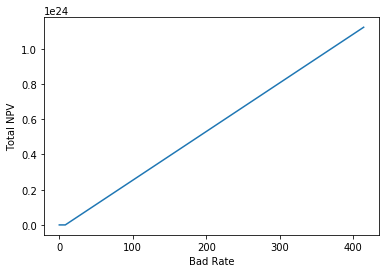

In [316]:
#Plot 
import matplotlib.pyplot as plt
plt.plot(npv_per_rate['bad_rate'],npv_per_rate['total_npv'])
plt.xlabel('Bad Rate')
plt.ylabel('Total NPV')

In [322]:
x = x.drop(index=['G8','G9','G10'])

In [323]:
x

,total_npv,bad_rate
G1,2.007424e+10,0.040284
G2,2.277623e+09,0.188529
G3,3.789761e+08,0.350497
G4,4.829415e+07,0.568912
G5,3.320723e+06,0.866559
G6,-2.694823e+06,1.422726
G7,-1.418821e+08,2.406529


Text(0, 0.5, 'Total NPV')

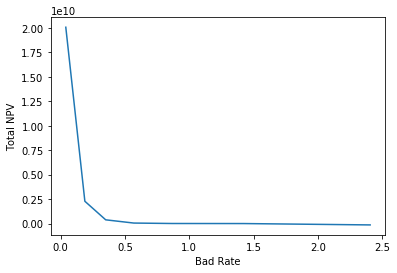

In [325]:
plt.plot(x['bad_rate'],x['total_npv'])
plt.xlabel('Bad Rate')
plt.ylabel('Total NPV')